# Dimensionality Reduction

Many Machine Learning problems involve thousands or even millions of features foreach  training  instance.  Not  only  do  all  these  features  make  training  extremely  slow,but  they  can  also  make  it  much  harder  to  find  a  good  solution,  as  we  will  see. Thisproblem is often referred to as the curse of dimensionality.

Fortunately, in realworld problems, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. For example,consider the MNIST images: the pixels on the image borders  are  almost  always  white,  so  you  could  completely  drop  these  pixels  from  the training  set  without  losing  much  information. Additionally, two neighboring pixels  are  often  highly  correlated:  if  you  merge  them  into  a  single  pixel  (e.g.,  by  taking the mean of the two pixel intensities), you will not lose much information.

Reducing  dimensionality  does  cause  some  information  loss  (just like  compressing  an  image  to  JPEG  can  degrade  its  quality),  soeven  though  it  will  speed  up  training,  it  may  make  your  system perform  slightly  worse.  It  also  makes  your  pipelines  a  bit  more complex  and  thus  harder  to  maintain.  So,  if  training  is  too  slow, you  should  first  try  to  train  your  system  with  the  original  data before  considering  using  dimensionality  reduction.  In  some  cases, reducing  the  dimensionality  of  the  training  data  may  filter  outsome  noise  and  unnecessary  details  and  thus  result  in  higher  performance, but in general it won’t; it will just speed up training.

Apart  from  speeding  up  training,  dimensionality  reduction  is  also  extremely  usefulfor data visualization (or DataViz). Reducing the number of dimensions down to two(or three) makes it possible to plot a condensed view of a high-dimensional training set on a graph and often gain some important insights by visually detecting patterns, such  as  clusters.  Moreover,  DataViz  is  essential  to  communicate  your  conclusions  to people who are not data scientists in particular, decision makers who will use your results.In  this  chapter  we  will  discuss  the  curse  of  dimensionality  and  get  a  sense  of  whatgoes on in high-dimensional space. Then, we will consider the two main approachesto  dimensionality  reduction  (projection  and  Manifold  Learning),  and  we  will  gothrough three of the most popular dimensionality reduction techniques: PCA, KernelPCA, and LLE.

## The Curse of Dimensionality

We are so used to living in three dimensions1 that our intuition fails us when we try to imagine a high-dimensional space. Even a basic 4D hypercube is incredibly hard topicture in our minds (see Figure 8-1), let alone a 200-dimensional ellipsoid bent in a 1,000-dimensional space.

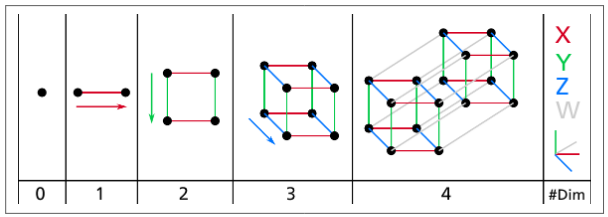

It turns out that many things behave very differently in high-dimensional space. For example, if you pick a random point in a unit square (a 1 × 1 square), it will have onlyabout a 0.4% chance of being located less than 0.001 from a border (in other words, it is very unlikely that a random point will be “extreme” along any dimension). But in a 10,000-dimensional unit hypercube, this probability is greater than 99.999999%. Mostpoints in a high-dimensional hypercube are very close to the border.

Here  is  a  more  troublesome  difference:  if  you  pick  two  points  randomly  in  a  unitsquare, the distance between these two points will be, on average, roughly 0.52. If youpick two random points in a unit 3D cube, the average distance will be roughly 0.66. But  what  about  two  points  picked  randomly  in  a  1,000,000-dimensional  hypercube?The average distance, believe it or not, will be about 408.25 (roughly 1, 000, 000/6)!This is counterintuitive: how can two points be so far apart when they both lie within the  same  unit  hypercube?  Well,  there’s  just  plenty  of  space  in  high  dimensions.  As  aresult,  high-dimensional  datasets  are  at  risk  of  being  very  sparse:  most  training in stances  are  likely  to  be  far  away  from  each  other.  This  also  means  that  a  new instance will likely be far away from any training instance, making predictions muchless reliable than in lower dimensions, since they will be based on much larger extrapolations.  In  short,  the  more  dimensions  the  training  set  has,  the  greater  the  risk  of overfitting it.

In theory, one solution to the curse of dimensionality could be to increase the size of the  training  set  to  reach  a  sufficient  density  of  training  instances.  Unfortunately,  in practice,  the  number  of  training  instances  required  to  reach  a  given  density  grows exponentially  with  the  number  of  dimensions.  With  just  100  features  (significantly fewer  than  in  the  MNIST  problem),  you  would  need  more  training  instances  than atoms  in  the  observable  universe  in  order  for  training  instances  to  be  within  0.1  of each  other  on  average,  assuming  they  were  spread  out  uniformly  across  all  dimensions.

## Main Approaches for Dimensionality Reduction

Before  we  dive  into  specific  dimensionality  reduction  algorithms,  let’s  take  a  look  at the  two  main  approaches  to  reducing  dimensionality:  projection  and  ManifoldLearning.

### Projection

In most realworld problems, training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated (as discussed earlier for MNIST). As a result, all training instances lie within (or close to)  a  much  lower-dimensional  subspace  of  the  high-dimensional  space.  This  sounds very abstract, so let’s look at an example. In Figure below you can see a 3D dataset represented by circles.

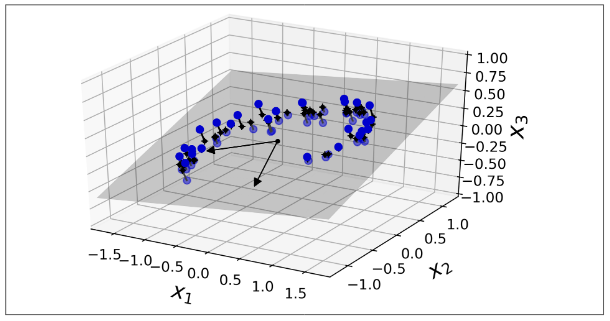

Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace  of  the  high-dimensional  (3D)  space.  If  we  project  every  training  instance perpendicularly  on to  this  subspace  (as  represented  by  the  short  lines  connecting  the instances  to  the  plane),  we  get  the  new  2D  dataset  shown  in  Figure below.  Ta-da!  We have just reduced the dataset’s dimensionality from 3D to 2D. Note that the axes correspond to new features z1 and z2 (the coordinates of the projections on the plane).

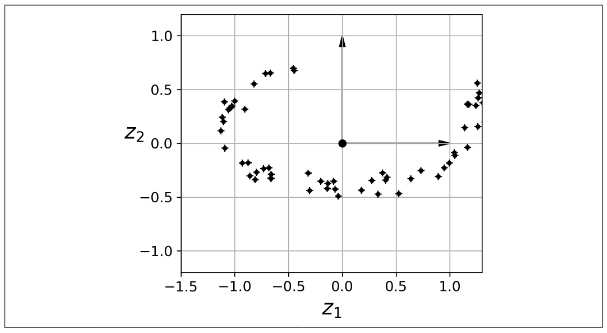



However,  projection  is  not  always  the  best  approach  to  dimensionality  reduction.  In many cases the subspace may twist and turn, such as in the famous Swiss roll toy data‐set represented in Figure below.

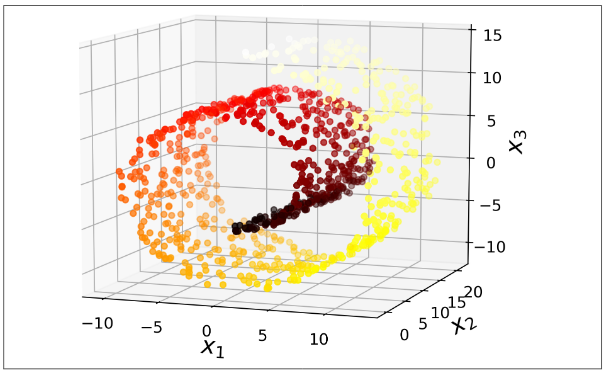

Simply projecting onto a plane (e.g., by dropping x3) would squash different layers of the Swiss roll together, as shown on the left side of Figure below. What you really want is to unroll the Swiss roll to obtain the 2D dataset on the right side of Figure below.

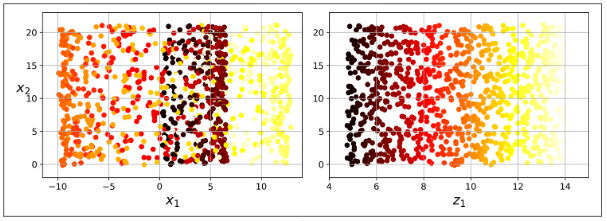

### Manifold Learning

The  Swiss  roll  is  an  example  of  a  2D  manifold.  Put  simply,  a  2D  manifold  is  a  2D shape  that  can  be  bent  and  twisted  in  a  higher-dimensional  space.  More  generally,  a d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third dimension.

Many dimensionality reduction algorithms work by modeling the manifold on which the  training  instances  lie;  this  is  called  Manifold  Learning.  It  relies  on  the  manifold assumption,  also  called  the  manifold  hypothesis,  which  holds  that  most  real-world high-dimensional  datasets  lie  close  to  a  much  lower-dimensional  manifold.  This assumption is very often empirically observed.

Once again, think about the MNIST dataset: all handwritten digit images have some similarities.  They  are  made  of  connected  lines,  the  borders  are  white,  and  they  are more  or  less  centered.  If  you  randomly  generated  images,  only  a  ridiculously  tiny fraction  of  them  would  look  like  handwritten  digits.  In  other  words,  the  degrees  of freedom available to you if you try to create a digit image are dramatically lower than the  degrees  of  freedom  you  would  have  if  you  were  allowed  to  generate  any  image you  wanted.  These  constraints  tend  to  squeeze  the  dataset  into  a  lower-dimensional manifold.

The manifold assumption is often accompanied by another implicit assumption: that the  task  at  hand  (e.g.,  classification  or  regression)  will  be  simpler  if  expressed  in  the lower-dimensional  space  of  the  manifold.  For  example,  in  the  top  row  of  Figure  below  Swiss  roll  is  split  into  two  classes:  in  the  3D  space  (on  the  left),  the  decision boundary  would  be  fairly  complex,  but  in  the  2D  unrolled  manifold  space  (on  theright), the decision boundary is a straight line.

However, this implicit assumption does not always hold. For example, in the bottomrow of figure below, the decision boundary is located at x1 = 5. This decision boundary looks very simple in the original 3D space (a vertical plane), but it looks more complex in the unrolled manifold (a collection of four independent line segments).

In short, reducing the dimensionality of your training set before training a model will usually speed up training, but it may not always lead to a better or simpler solution; it all depends on the dataset.

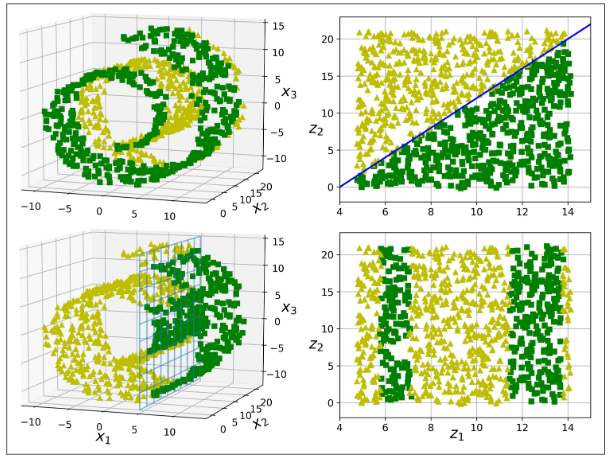

## PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

### Preserving The Variance

Before  you  can  project  the  training  set  onto  a  lower-dimensional  hyperplane,  you first need to choose the right hyperplane. For example, a simple 2D dataset is represented on the left in Figure below, along with three different axes (i.e., 1D hyperplanes).On  the  right  is  the  result  of  the  projection  of  the  dataset  onto  each  of  these  axes.  As you can see, the projection onto the solid line preserves the maximum variance, while the  projection  onto  the  dotted  line  preserves  very  little  variance  and  the  projection onto the dashed line preserves an intermediate amount of variance.

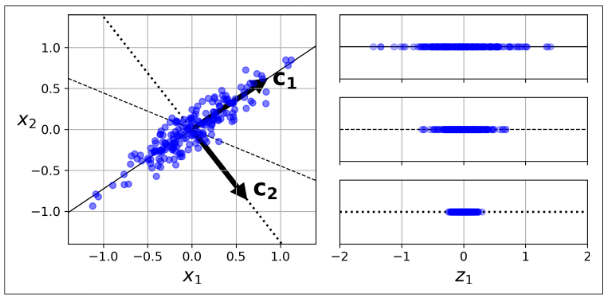

It  seems  reasonable  to  select  the  axis  that  preserves  the  maximum  amount  of  variance, as it will most likely lose less information than the other projections. Another way  to  justify  this  choice  is  that  it  is  the  axis  that  minimizes  the  mean  squared  distance between the original dataset and its projection onto that axis. This is the rather simple idea behind PCA.

### Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the training set. In Figure above, it is the solid line. It also finds a second axis, orthogonal to the first  one,  that  accounts  for  the  largest  amount  of  remaining  variance.  In  this  2D example there is no choice: it is the dotted line. If it were a higher-dimensional dataset, PCA would also find a third axis, orthogonal to both previous axes, and a fourth,a fifth, and so on as many axes as the number of dimensions in the dataset. The  i<sup>th</sup>  axis  is  called  the  i<sup>th</sup> principal  component  (PC)  of  the  data.  In  Figure above,  the first  PC  is  the  axis  on  which  vector  c<sub>1</sub>  lies,  and  the  second  PC  is  the  axis  on  whichvector  c<sub>2</sub>  lies.

For each principal component, PCA finds a zero-centered unit vector  pointing  in  the  direction  of  the  PC.  Since  two  opposing  unit vectors  lie  on  the  same  axis,  the  direction  of  the  unit  vectorsreturned  by  PCA  is  not  stable:  if  you  perturb  the  training  sets lightly and run PCA again, the unit vectors may point in the opposite  direction  as  the  original  vectors.  However,  they  will  generally still lie on the same axes. In some cases, a pair of unit vectors may even rotate or swap (if the variances along these two axes are close), but the plane they define will generally remain the same.

There  is  a standard  matrix  factorization  technique  called  Singular  Value  Decomposition  (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices UΣV<sup>⊺</sup>, where V contains the unit vectors that define all the principal components that we are looking for, as shown in Equation below.

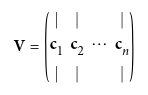

The  following  Python  code  uses  NumPy’s  svd()  function  to  obtain  all  the  principalcomponents of the training set, then extracts the two unit vectors that define the first two PCs:

In [1]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

NameError: name 'X' is not defined

PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn's PCA yourself (as in the preceding example), of if you use other libaries don't forgot to center the data first.

### Projecting Down to d Dimensions

Once  you  have  identified  all  the  principal  components,  you  can  reduce  the  dimenionality  of  the  dataset  down  to  d  dimensions  by  projecting  it  onto  the  hyperplane defined by the first d principal components. Selecting this hyperplane ensures that the projection will preserve as much variance as possible.

To project the training set onto the hyperplane and obtain a reduced dataset X<sub>d-proj</sub> of dimensionality  d,  compute  the  matrix  multiplication  of  the  training  set  matrix  X  by the matrix W<sub>d</sub>, defined as the matrix containing the first d columns of V, as shown in Equation below.

X<sub>d‐proj</sub> = XW<sub>d</sub>

The following Python code projects the training set onto the plane defined by the first two principal components:

In [ ]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

### Using Scikit-Learn

Scikit-Learn’s PCA class uses SVD decomposition to implement PCA, just like we did earlier in this chapter. The following code applies PCA to reduce the dimensionality of the dataset down to two dimensions (note that it automatically takes care of centering the data).

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

After  fitting  the  PCA  transformer  to  the  dataset,  its  components_  attribute  holds  the transpose  of  W<sub>d</sub>  (e.g.,  the  unit  vector  that  defines  the  first  principal  component  is equal to pca.components_.T[:, 0]).

### Explained Variance Ratio

Another  useful  piece  of  information  is  the  explained  variance  ratio  of  each  principal component,  available  via  the  explained_variance_ratio_  variable.  The  ratio  indicates  the  proportion  of  the  dataset’s  variance  that  lies  along  each  principal  component.

In [ ]:
pca.explained_variance_ratio_

This  output  tells  you  that  84.2%  of  the  dataset’s  variance  lies  along  the  first  PC,  and 14.6%  lies  along  the  second  PC.  This  leaves  less  than  1.2%  for  the  third  PC,  so  it  is reasonable to assume that the third PC probably carries little information.

**Note:** This Data Can Vary

### Choosing the Right Number of Dimensions

Instead  of  arbitrarily  choosing  the  number  of  dimensions  to  reduce  down  to,  it  is simpler  to  choose  the  number  of  dimensions  that  add  up  to  a  sufficiently  large  portion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for data visualization in that case you will want to reduce the dimensionality down to 2 or 3.

The  following  code  performs  PCA  without  reducing  dimensionality,  then  computesthe  minimum  number  of  dimensions  required  to  preserve  95%  of  the  training  set’s variance:

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

You  could  then  set  n_components=d  and  run  PCA  again.  But  there  is  a  much  better option:  instead  of  specifying  the  number  of  principal  components  you  want  to  preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve:

In [ ]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(X_train)

Yet  another  option  is  to  plot  the  explained  variance  as  a  function  of  the  number  of dimensions (simply plot cumsum; see Figure below). There will usually be an elbow in the curve, where the explained variance stops growing fast. In this case, you can see that reducing  the  dimensionality  down  to  about  100  dimensions  wouldn’t  lose  too  much explained variance.

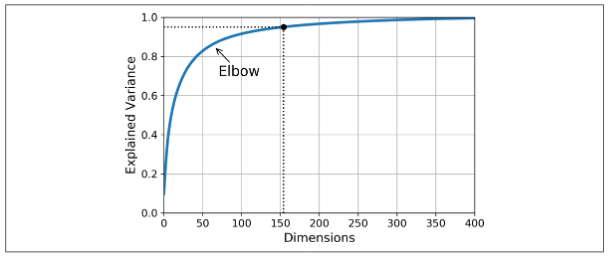

### PCA for Compresson

Obviously  after  dimensionality  reduction,  the  training  set  takes  up  much  less  space. For example, try applying PCA to the MNIST dataset while preserving 95% of its variance.  You  should  find  that  each  instance  will  have  just  over  150  features,  instead  of the  original  784  features.  So  while  most  of  the  variance  is  preserved,  the  dataset  is now less than 20% of its original size! This is a reasonable compression ratio, and you can  see  how  this  can  speed  up  a  classification  algorithm  (such  as  an  SVM  classifier) tremendously.

It  is  also  possible  to  decompress  the  reduced  dataset  back  to  784  dimensions  by applying the inverse transformation of the PCA projection. Of course this won’t give you  back  the  original  data,  since  the  projection  lost  a  bit  of  information  (within  the 5%  variance  that  was  dropped),  but  it  will  likely  be  quite  close  to  the  original  data. The  mean  squared  distance  between  the  original  data  and  the  reconstructed  data (compressed and then decompressed) is called the reconstruction error. For example, the following code compresses the MNIST dataset down to 154 dimensions, then uses the   inverse_transform()   method   to   decompress   it   back   to   784   dimensions. Figure below shows a few digits from the original training set (on the left), and the cor‐responding  digits  after  compression  and  decompression.  You  can  see  that  there  is  as light image quality loss, but the digits are still mostly intact.

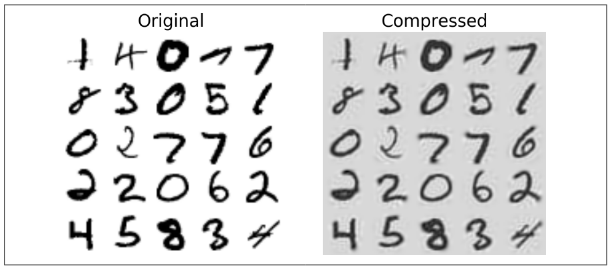

In [ ]:
pca = PCA(n_components=154)
X_mnist_reduced = pca.fit_transform(X_mnist)
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

The equation of the inverse transform is shown below.

X<sub>recovered</sub> = 𝐀<sub>d‐proj</sub>·W<sub>d</sub><sup>T</sup>

### Incremental PCA

One problem with the preceding implementation of PCA is that it requires the whole training  set  to  fit  in  memory  in  order  for  the  SVD  algorithm  to  run.  Fortunately, Incremental  PCA  (IPCA)  algorithms  have  been  developed:  you  can  split  the  trainingset  into  mini-batches  and  feed  an  IPCA  algorithm  one  mini-batch  at  a  time.  This  isuseful  for  large  training  sets,  and  also  to  apply  PCA  online  (i.e.,  on  the  fly,  as  new instances arrive).

The  following  code  splits  the  MNIST  dataset  into  100  mini-batches  (using  NumPy’s array_split()  function)  and  feeds  them  to  Scikit-Learn’s  IncrementalPCA  class to  reduce  the  dimensionality  of  the  MNIST  dataset  down  to  154  dimensions.  Note  that  you  must  call  the  partial_fit()  method  with  each  mini-batch rather than the fit() method with the whole training set:

In [4]:
import numpy as np

from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_mnist_reduced  = inc_pca.transform(X_mnist)

NameError: name 'X_mnist' is not defined

Alternatively,  you  can  use  NumPy’s  memmap  class,  which  allows  you  to  manipulate  a large  array  stored  in  a  binary  file  on  disk  as  if  it  were  entirely  in  memory;  the  class loads  only  the  data  it  needs  in  memory,  when  it  needs  it.  Since  the  IncrementalPCA class uses only a small part of the array at any given time, the memory usage remains under control. This makes it possible to call the usual fit() method, as you can see in the following code:

In [5]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fix(X_mm)

NameError: name 'filename' is not defined